First I created the simple sound file in [Reaper](https://www.reaper.fm/). I could not use the base WAV (Waveform Audio File Format) file because it stores it as 24-bit data which does not work with the scipy `wavfile` method. However, choosing 32-bit data is a simple option when you render the sound.

The sound I created was simple 2 seconds of a sine wave at around C4. Zooming in to a 0.045 second window we can see the wave in Reaper. A simple peak-to-peak measure was 0.00375 seconds long which gives a frequency around 267 herz. Since this was a C4, which is typically 262 it is not too far off.

To read the file a quick search brought up [the `wavfile` method from scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html). I basically follow the example provided there on my sound.

In [1]:
from scipy.io import wavfile
from pathlib import Path

In [4]:
p = Path('sounds')

In [5]:
q = p / 'simple_c4.wav'

In [6]:
q

WindowsPath('sounds/simple_c4.wav')

In [7]:
sample_rate, data = wavfile.read(q)

c:\python37\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [8]:
sample_rate

44100

In [9]:
data

array([[ 0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00],
       [-3.8028106e-06, -3.8028106e-06],
       ...,
       [-6.6743125e-03, -6.6743125e-03],
       [-4.4752425e-03, -4.4752425e-03],
       [-2.2473824e-03, -2.2473824e-03]], dtype=float32)

In [10]:
data.shape

(88200, 2)

Since the recording is 2 seconds long and the sample rate is 44100, there are 88200 samples total, as expected. This is a list of channel lists. So, the stereo data is recorded for each sample.

In [13]:
length = data.shape[0] / sample_rate
length

2.0

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
time = np.linspace(0., length, data.shape[0])

In this case the channels are the same, so just plotting the first one:

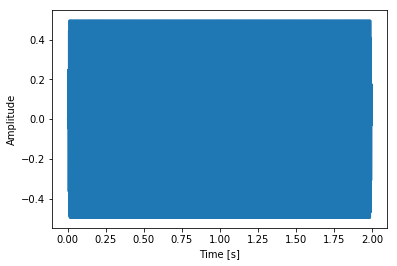

In [15]:
plt.plot(time, data[:, 0])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

Too much info for this tiny graph! Let's look at just one second and then zoom in more.

In [18]:
span_length = data.shape[0] // 2

In [19]:
span_length

44100

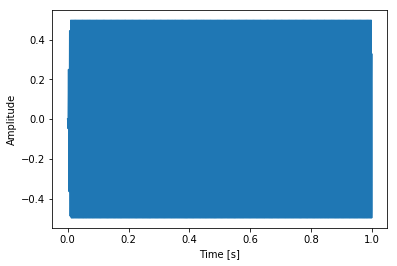

In [20]:
plt.plot(time[:span_length], data[:span_length, 0])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [21]:
span_length = data.shape[0] // 20

In [22]:
span_length

4410

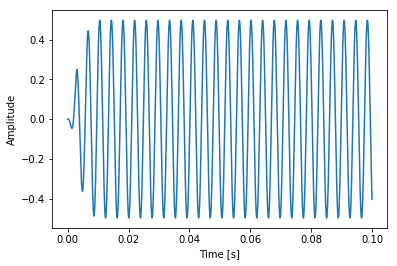

In [23]:
plt.plot(time[:span_length], data[:span_length, 0])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [24]:
span_length = data.shape[0] // 200

In [25]:
span_length

441

In [28]:
start_sample = 500

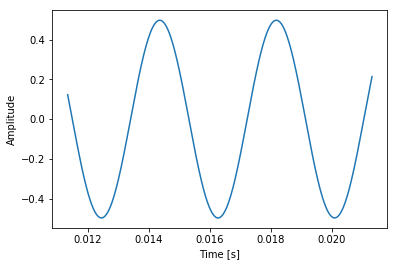

In [29]:
plt.plot(time[start_sample:start_sample+span_length], data[start_sample:start_sample+span_length, 0])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

A simple sine wave!